In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- Promedio general de accesos por provincia

In [49]:
df_accesos_internet = pd.read_csv('CSV\Internet_penetracion_internet_por_cada_100_hogares.csv')
df_accesos_internet.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [50]:
df_accesos_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [51]:
df_accesos_internet['Accesos por cada 100 hogares'] = df_accesos_internet['Accesos por cada 100 hogares'].str.replace('.', '').str.replace(',', '.').astype(float)

El informe muestra el promedio general de accesos por provincia. Se observa que "Capital Federal" tiene el promedio más alto con 113.379429, seguido de "Tierra Del Fuego" con 78.151714 y "La Pampa" con 70.605143. Por otro lado, "Formosa" tiene el promedio más bajo con 26.214857.

In [52]:
# Calcular el promedio general de accesos para cada provincia
promedio_provincias = df_accesos_internet.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Crear un DataFrame para almacenar los resultados
resultados_promedio_provincias = pd.DataFrame({'Provincia': promedio_provincias.index, 'Promedio general de accesos': promedio_provincias.values})

# Ordenar las provincias según su promedio general de accesos en orden descendente
orden_provincias = resultados_promedio_provincias.sort_values(by='Promedio general de accesos', ascending=False)

# Mostrar el DataFrame
orden_provincias

,Provincia,Promedio general de accesos
1,Capital Federal,113.379429
22,Tierra Del Fuego,78.151714
10,La Pampa,70.605143
6,Córdoba,66.356286
0,Buenos Aires,63.552000
20,Santa Fe,62.392000
14,Neuquén,61.908286
15,Río Negro,53.143143
4,Chubut,52.187143
7,Entre Ríos,50.797429


- Distribución de accesos a Internet por provincia en cada trimestre por cada 100 hogares

En la siguiente visualizacion se puede evaluar la cantidad de accesos a Internet por provincia en cada trimestre. Para lograr esto, se ha hecho una separación por periodos para generar cuatro gráficas, una para cada trimestre (trimestres 1, 2, 3 y 4), cada gráfica de barras muestra en el eje 'x' las provincias y en el eje 'y' la cantidad de accesos por cada 100 hogares. 

Se pueden identificar las variaciones en los accesos a Internet a lo largo de cada trimestre y entre diferentes provincias. Al comparar las gráficas es posible observar cambios en la distribución de los accesos a Internet en las provincias y detectar posibles tendencias o diferencias.

Con esto se puede comprender la situación de las empresas de servicios de Internet en diferentes regiones y períodos de tiempo. Estas visualizaciones serviran para analizar de forma más detallada la exploración de los datos.

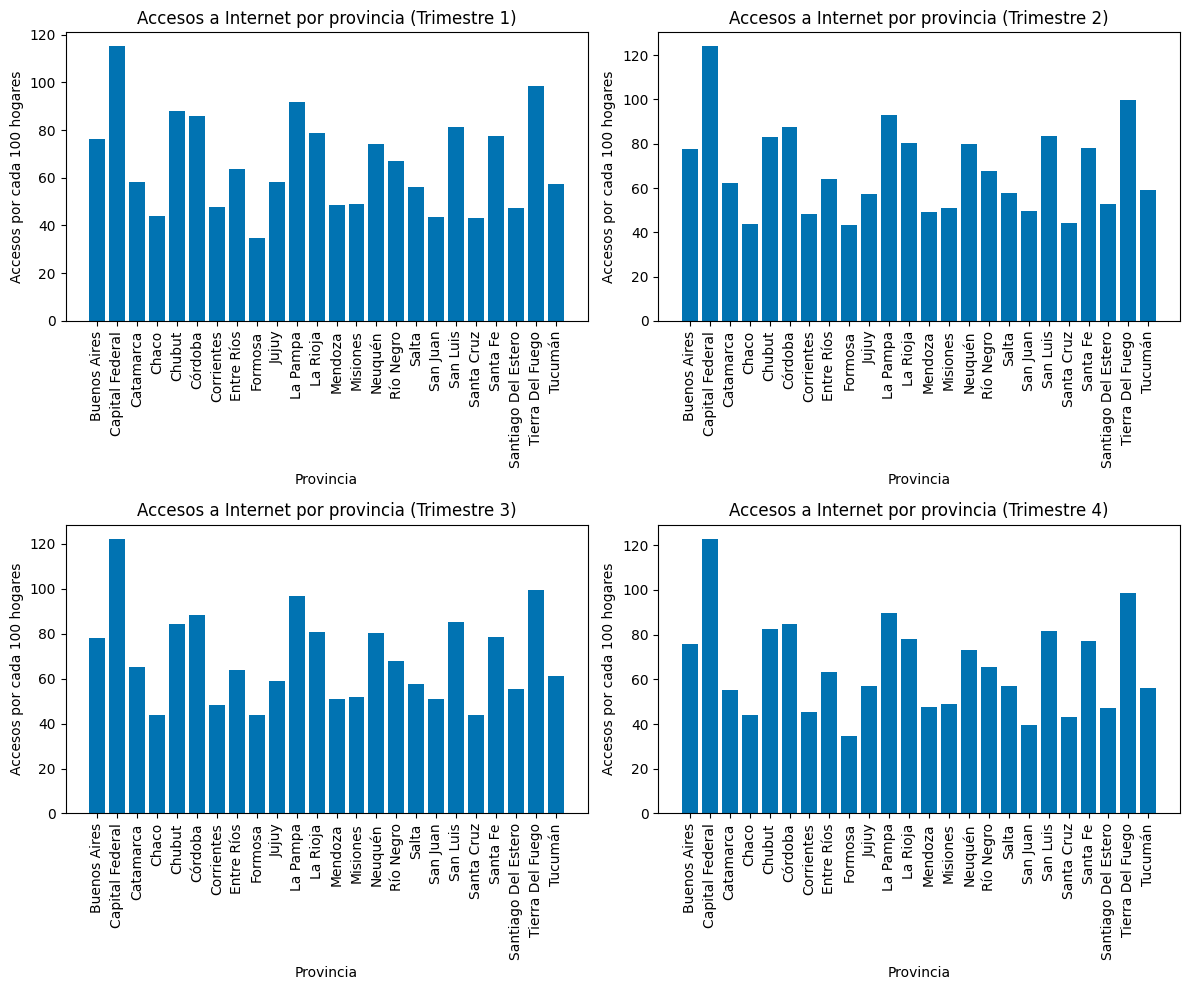

In [53]:
# Crear una figura y cuatro subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
color_colorblind = sns.color_palette("colorblind")[0]

# Iterar sobre los trimestres del 1 al 4
for trimestre, ax in zip(range(1, 5), axes.flatten()):
    
    # Filtrar los datos para el trimestre actual
    df_trimestre = df_accesos_internet[df_accesos_internet['Trimestre'] == trimestre]

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(df_trimestre['Provincia'], df_trimestre['Accesos por cada 100 hogares'], color= color_colorblind)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Accesos por cada 100 hogares')
    ax.set_title(f'Accesos a Internet por provincia (Trimestre {trimestre})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Análisis de accesos internet por tecnologías

In [54]:
df_accesos_tec= pd.read_csv('CSV\Serie_trimestral_internet_accesos-por-tecnologia.csv')
df_accesos_tec.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [55]:
df_accesos_tec['Wireless'] = df_accesos_tec['Wireless'].astype(str).str.replace('.', '').astype(int)
df_accesos_tec['Otros'] = df_accesos_tec['Otros'].astype(str).str.replace('.', '').astype(int)
df_accesos_tec['Total'] = df_accesos_tec['Total'].astype(str).str.replace('.', '').astype(int)

In [56]:
df_accesos_tec['ADSL'] = df_accesos_tec['ADSL'].str.replace('.', '').astype(int)
df_accesos_tec['Cablemodem'] = df_accesos_tec['Cablemodem'].str.replace('.', '').astype(int)
df_accesos_tec['Fibra óptica'] = df_accesos_tec['Fibra óptica'].str.replace('.', '').astype(int)

In [57]:
df_accesos_tec['Año'] = df_accesos_tec['Año'].astype(str)
df_accesos_tec['Trimestre'] = df_accesos_tec['Trimestre'].astype(str)

In [58]:
df_accesos_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     object
 1   Trimestre     35 non-null     object
 2   ADSL          35 non-null     int32 
 3   Cablemodem    35 non-null     int32 
 4   Fibra óptica  35 non-null     int32 
 5   Wireless      35 non-null     int32 
 6   Otros         35 non-null     int32 
 7   Total         35 non-null     int32 
 8   Periodo       35 non-null     object
dtypes: int32(6), object(3)
memory usage: 1.8+ KB


In [59]:
df_accesos_tec.head(5)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,55711,23523,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
4,2021,3,1950631,5826257,1566048,492415,25019,10085541,Jul-Sept 2021


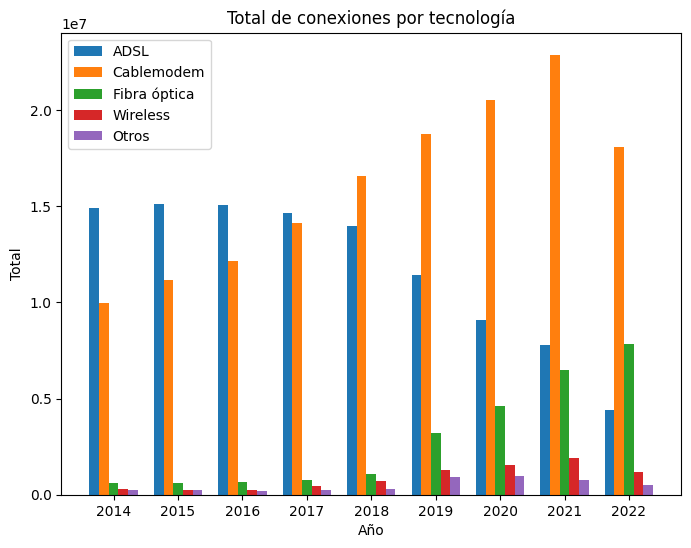

In [60]:
# Calcular la suma de los años
df_suma = df_accesos_tec.groupby('Año').sum().reset_index()

# Configurar los datos para el gráfico
years = df_suma['Año']
adsl = df_suma['ADSL']
cablemodem = df_suma['Cablemodem']
fibra_optica = df_suma['Fibra óptica']
wireless = df_suma['Wireless']
otros = df_suma['Otros']

# Crear el gráfico de barras agrupados
x = range(len(years))
width = 0.15

fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño del gráfico

rects1 = ax.bar(x, adsl, width, label='ADSL')
rects2 = ax.bar([i + width for i in x], cablemodem, width, label='Cablemodem')
rects3 = ax.bar([i + width*2 for i in x], fibra_optica, width, label='Fibra óptica')
rects4 = ax.bar([i + width*3 for i in x], wireless, width, label='Wireless')
rects5 = ax.bar([i + width*4 for i in x], otros, width, label='Otros')

# Configurar el eje x
ax.set_xticks([i + width*2 for i in x])
ax.set_xticklabels(years)
ax.set_xlabel('Año')

# Configurar el eje y
ax.set_ylabel('Total')
ax.set_title('Total de conexiones por tecnología')
ax.legend()

# Mostrar el gráfico
plt.show()

El gráfico de barras agrupados muestra la evolución de los accesos a diferentes tecnologías (ADSL, Cablemodem, Fibra óptica, Wireless, Otros) a lo largo de los años. A partir del gráfico, puedes obtener varias conclusiones:

La tendencia general muestra un aumento en las ventas de todas las tecnologías a medida que avanzan los años.

La tecnología de Cablemodem tiene las ventas más altas en todos los años, seguida de Fibra óptica y ADSL.

A lo largo de los años, la tecnología de Fibra óptica ha experimentado un crecimiento significativo, superando a ADSL en ventas a partir del año 2021.


- Evaluación de la Velocidad de bajada (Mbps) en diferentes provincias

In [110]:
df_velocidad_bajada= pd.read_csv('CSV\historico_velocidad_media_internet.csv')

In [121]:
df_velocidad_bajada = df_velocidad_bajada.drop(["Unnamed: 4", "Unnamed: 5"], axis=1)

In [126]:
df_velocidad_bajada.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70.19
1,2022,3,Capital Federal,101.05
2,2022,3,Catamarca,60.99
3,2022,3,Chaco,53.21
4,2022,3,Chubut,15.57


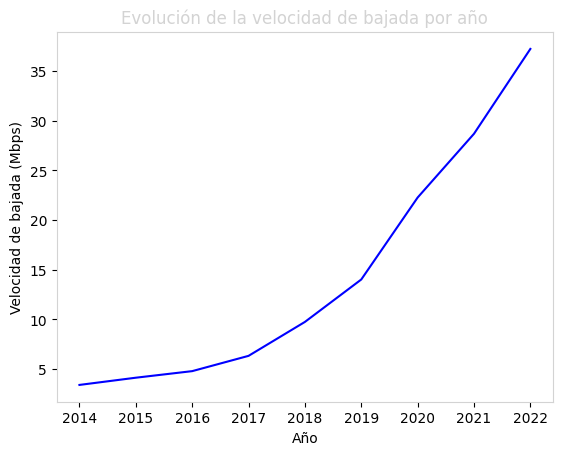

In [115]:
# Promediar los valores de Mbps (Media de bajada) por año
df_promedio = df_velocidad_bajada.groupby('Año')['Mbps (Media de bajada)'].mean()

plt.plot(df_promedio.index, df_promedio.values, color='b')

plt.xlabel('Año')
plt.ylabel('Velocidad de bajada (Mbps)')
plt.title('Evolución de la velocidad de bajada por año')

plt.show()

El gráfico muestra la evolución de la velocidad de bajada promedio en Mbps a lo largo de los años. Se puede concluir que si la línea tiende a subir, indica un aumento en la velocidad de bajada promedio con el tiempo, se observa cómo varía la velocidad de bajada promedio de un año a otro significativamente a partir del año 2020. 

In [125]:
df_velocidad_bajada.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.857238
std,2.528745,1.105009,14.666514
min,2014.000000,1.000000,2.570000
25%,2016.000000,1.000000,4.250000
50%,2018.000000,2.000000,7.095000
75%,2020.000000,3.000000,18.317500
max,2022.000000,4.000000,101.050000


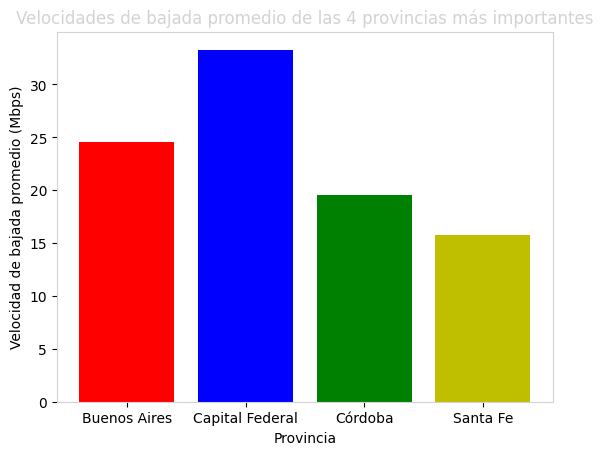

In [178]:
# Filtrar el dataframe para obtener los datos de las cuatro provincias
provincias = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_filtered = df_velocidad_bajada[df_velocidad_bajada['Provincia'].isin(provincias)]

# Calcular las velocidades de bajada promedio por provincia
velocidades_promedio = df_filtered.groupby('Provincia')['Mbps (Media de bajada)'].mean()

colores = ['r', 'b', 'g', 'y']

plt.bar(velocidades_promedio.index, velocidades_promedio.values, color=colores)
plt.xlabel('Provincia')
plt.ylabel('Velocidad de bajada promedio (Mbps)')
plt.title('Velocidades de bajada promedio de las 4 provincias más importantes')

plt.show()

Del dataframe Velocidades de bajada promedio y el grafico podemos concluir que:

La provincia con la mayor velocidad de bajada registrada en el período de estudio es la Capital Federal, con una velocidad máxima de 101 Mbps.

La provincia con la menor velocidad de bajada registrada en el período de estudio es Tierra del Fuego, con una velocidad mínima de 2.5 Mbps.

Las 4 provincias más grandes con mayor Velocidad de bajada son:

Capital Federal: Velocidad máxima de 101 Mbps.

Buenos Aires: Velocidad máxima de 70 Mbps.

Córdoba: Velocidad máxima de 56 Mbps.

Santa Fe: Velocidad máxima de 45 Mbps.

- Análisis de distribución de Banda Ancha y Dial Up

Se tiene como objetivo crear, analizar y explicar las gráficas de la distribución de Banda Ancha y Dial Up, considerando el año y las provincias como variables. Estas representaciones visuales proporcionarán información detallada sobre la distribución de los servicios de Internet.

Se muestraran las provincias que utilizan en mayor medida la Banda Ancha Fija en relación al uso total en todas las provincias. Se espera que las provincias con mayor población y centros urbanos más desarrollados tengan una proporción más elevada de uso de Banda Ancha Fija. Estas gráficas nos permitirán identificar las provincias líderes en términos de adopción de Banda Ancha Fija y comprender su relevancia en el acceso a Internet de alta velocidad.

Estas representaciones gráficas serán útiles para identificar las provincias destacadas en términos de adopción de Banda Ancha Fija, así como para seguir la evolución del uso de estos servicios durante el período analizado. El análisis de estas gráficas nos proporcionará información valiosa para comprender la situación actual del acceso a Internet en el país y tomar decisiones fundamentadas para mejorar la conectividad en áreas con menor adopción.

In [170]:
df_banda_ancha = pd.read_csv('CSV\Internet_total_accesos_por_B_Aancha_y_B_angosta.csv')
df_banda_ancha.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [173]:
df_banda_ancha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               35 non-null     int64 
 1   Trimestre         35 non-null     int64 
 2   Banda ancha fija  35 non-null     int32 
 3   Dial up           35 non-null     int32 
 4   Total             35 non-null     int32 
 5   Periodo           35 non-null     object
dtypes: int32(3), int64(2), object(1)
memory usage: 1.4+ KB


In [172]:
# Transformación de datos
df_banda_ancha['Dial up'] = df_banda_ancha['Dial up'].astype(str).str.replace('.', '').astype(int)
df_banda_ancha['Banda ancha fija'] = df_banda_ancha['Banda ancha fija'].str.replace('.', '').astype(int)
df_banda_ancha['Total'] = df_banda_ancha['Total'].str.replace('.', '').astype(int)

In [174]:
df_banda_ancha.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11078691,12437,11091128,Jul-Sept 2022
1,2022,2,10946248,12436,10958684,Abr-Jun 2022
2,2022,1,10611390,12619,10624009,Ene-Mar 2022
3,2021,4,10476933,12861,10489794,Oct-Dic 2021
4,2021,3,10075184,10357,10085541,Jul-Sept 2021


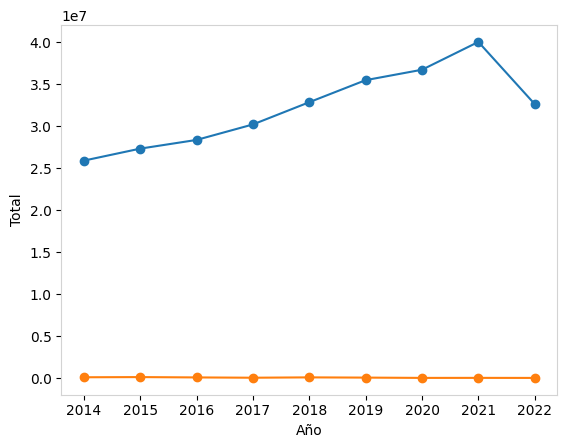

In [179]:
df_grouped = df_banda_ancha.groupby('Año').sum()

plt.plot(df_grouped.index, df_grouped['Banda ancha fija'], marker='o', label='Banda ancha fija')

# Crear el gráfico de líneas para Dial up
plt.plot(df_grouped.index, df_grouped['Dial up'], marker='o', label='Dial up')

# Configura los ejes y etiquetas
plt.xlabel('Año')
plt.ylabel('Total')

# Muestra el gráfico
plt.show()


Basándonos en el gráfico de líneas que muestra las tendencias de "Banda ancha fija" y "Dial up" a lo largo de los años, podemos obtener algunas conclusiones:

De la línea banda ancha fija muestra una tendencia generalmente creciente a lo largo de los años. Esto indica un aumento en el número de conexiones de banda ancha fija en cada año registrado en los datos. Esta tendencia puede indicar un mayor acceso a Internet de alta velocidad y una mayor demanda de conexiones más rápidas y estables.

La línea correspondiente a "Dial up" muestra una tendencia generalmente que varia entre constante y decreciente a lo largo de los años. Esto sugiere una disminución en el número de conexiones de dial up en cada año registrado en los datos. La tecnología de dial up ha quedado obsoleta y ha sido reemplazada en gran medida por conexiones de banda ancha más rápidas y eficientes.

- Análisis de ingresos totales servicios de internet

In [180]:
df_ingresos_internet= pd.read_csv('CSV\Internet_Ingresos_trimestrales_servicios_internet.csv')

In [183]:
df_ingresos_internet.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930,Jul-Sept 2022
1,2022,2,60335724,Abr-Jun 2022
2,2022,1,55589997,Ene-Mar 2022
3,2021,4,45467887,Oct-Dic 2021
4,2021,3,42999944,Jul-Sept 2021


In [182]:
df_ingresos_internet['Ingresos (miles de pesos)'] = df_ingresos_internet['Ingresos (miles de pesos)'].astype(str).str.replace('.', '').astype(int)

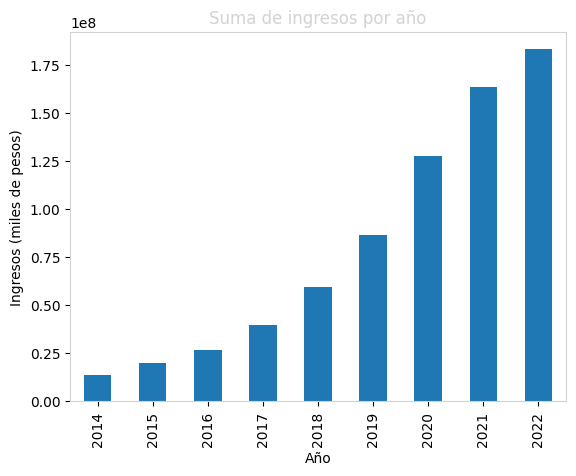

In [186]:
# Extraer el año del periodo y convertirlo a tipo numérico
df_ingresos_internet['Año'] = df_ingresos_internet['Periodo'].str.extract('(\d+)').astype(int)

# Agrupar por año y calcular la suma de los ingresos
df_agrupado = df_ingresos_internet.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Crear el gráfico de barras
df_agrupado.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Suma de ingresos por año')
plt.show()


El gráfico de barras muestra los ingresos totales por año, representando visualmente la distribución y evolución de los ingresos durante el periodo de tiempo analizado.

En el eje horizontal se encuentra el año, mientras que en el eje vertical se muestra la suma de los ingresos totales en miles de pesos. Cada barra representa un año específico y su altura indica el valor de los ingresos totales correspondientes.

Basándonos en los datos proporcionados sobre los ingresos totales en miles de pesos a lo largo de varios años, hemos realizado un análisis que destaca los siguientes puntos clave:

El gráfico de barras proporciona una representación visual efectiva de los ingresos por año, permitiendo comparaciones rápidas y facilitando la identificación de tendencias, años destacados y variabilidad en los ingresos.

Este análisis permite comprender mejor la evolución de los ingresos a lo largo del tiempo y proporciona información relevante sobre los años de mayor y menor desempeño económico.

- Matriz de correlación de variables relacionadas con los ingresos de la TV

In [15]:
df_Ingreso_Tv = pd.read_csv('C:/Users/cesua/OneDrive/Documentos/Henry/Proyecto_Individual_2-DA_Telecomunicaciones/CSV/TV_ingresos_trimestrales_servicios.csv')
df_Ingreso_Tv.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,52242784.63,27073190.89
1,2022,2,46292673.44,23559484.83
2,2022,1,42093870.19,21268086.24
3,2021,4,38273391.80,18038065.44
4,2021,3,36398025.53,18039519.50


In [16]:
print(df_Ingreso_Tv.columns)

Index(['Año', 'Trimestre', 'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)'],
      dtype='object')


In [17]:
# Ya fue corregido
# df_Ingreso_Tv['Ingresos TV por suscripción  (miles de $)'] = df_Ingreso_Tv['Ingresos TV por suscripción  (miles de $)'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float)
# df_Ingreso_Tv['Ingresos TV satelital (miles de $)'] = df_Ingreso_Tv['Ingresos TV satelital (miles de $)'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float)

In [18]:
print(df_Ingreso_Tv.corr())

                                                Año  Trimestre   
Año                                        1.000000  -0.063178  \
Trimestre                                 -0.063178   1.000000   
Ingresos TV por suscripción  (miles de $)  0.940823   0.006586   
Ingresos TV satelital (miles de $)         0.945157   0.004653   

                                           Ingresos TV por suscripción  (miles de $)   
Año                                                                         0.940823  \
Trimestre                                                                   0.006586   
Ingresos TV por suscripción  (miles de $)                                   1.000000   
Ingresos TV satelital (miles de $)                                          0.996849   

                                           Ingresos TV satelital (miles de $)  
Año                                                                  0.945157  
Trimestre                                                           

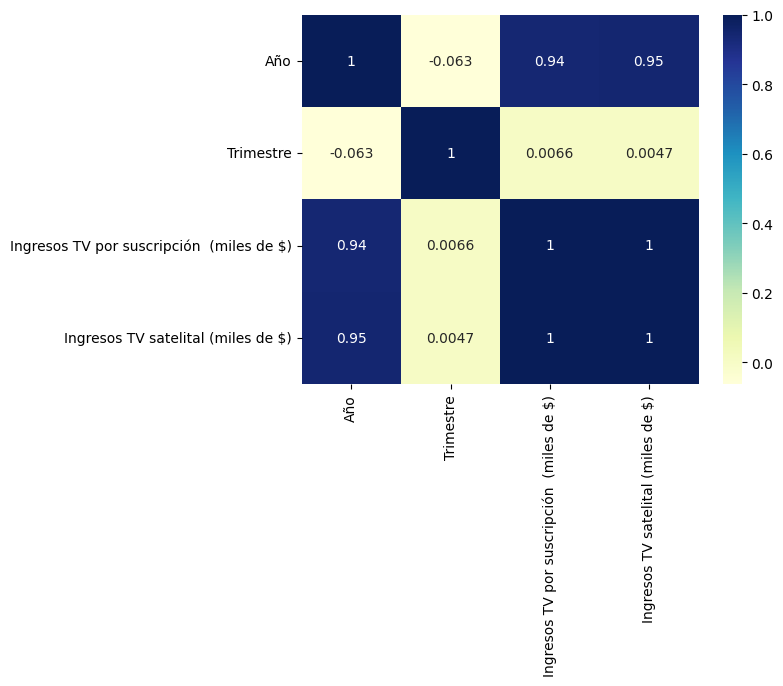

In [19]:
dataplot = sns.heatmap(df_Ingreso_Tv.corr(), cmap="YlGnBu", annot=True)

La matriz de correlación entre las diferentes variables en el dataframe se puede concluir que el valor 1.000000 en la intersección de "Año" y "Año" indica que ambas variables están perfectamente correlacionadas consigo mismas, lo cual es esperado.

El valor 0.940823 en la intersección de "Año" y "Ingresos TV por suscripción" indica una correlación fuerte positiva entre estas variables. Esto sugiere que a medida que el año aumenta, los ingresos por suscripción de TV tienden a aumentar.

De manera similar, los otros valores en la tabla representan la correlación entre diferentes variables. Por ejemplo, el valor 0.996849 en la intersección de "Ingresos TV por suscripción" y "Ingresos TV satelital" indica una correlación muy fuerte y positiva entre ambas variables. Esto sugiere que los ingresos por suscripción de TV y los ingresos por TV satelital están altamente relacionados y tienden a aumentar juntos.

In [20]:
# df_Ingreso_Tv.to_csv('C:/Users/cesua/OneDrive/Documentos/Henry/Proyecto_Individual_2-DA_Telecomunicaciones/CSV/TV_ingresos_trimestrales_servicios.csv', index=False)

- Análisis del acceso a la telefonía movil y los ingresos producidos por año

In [9]:
df_Ingresos_Tmovil = pd.read_csv('CSV\Telefonia_movil_Ingresos_trimestrales.csv')
df_accesos_Tmovil = pd.read_csv('CSV\Telefonia_movil_Acceso_por_cada_100_habitantes.csv')

In [6]:
df_Ingresos_Tmovil.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013


In [5]:
df_Ingresos_Tmovil['Ingresos (miles de $)'] = df_Ingresos_Tmovil['Ingresos (miles de $)'].str.replace('$', '').str.replace('.', '').astype(int)

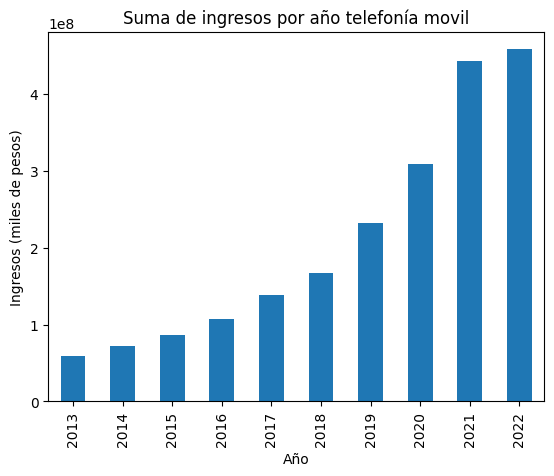

In [8]:
# Agrupar por año y calcular la suma de los ingresos
df_agrupado = df_Ingresos_Tmovil.groupby('Año')['Ingresos (miles de $)'].sum()

# Crear el gráfico de barras
df_agrupado.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Suma de ingresos por año telefonía movil')
plt.show()

In [17]:
df_accesos_Tmovil.head(10)

,Año,Trimestre,Accesos por cada 100 hab,Periodo
0,2013,1,154,Ene-Mar 2013
1,2013,2,156,Abr-Jun 2013
2,2013,3,159,Jul-Sept 2013
3,2013,4,159,Oct-Dic 2013
4,2014,1,148,Ene-Mar 2014
5,2014,2,143,Abr-Jun 2014
6,2014,3,143,Jul-Sept 2014
7,2014,4,143,Oct-Dic 2014
8,2015,1,140,Ene-Mar 2015
9,2015,2,139,Abr-Jun 2015


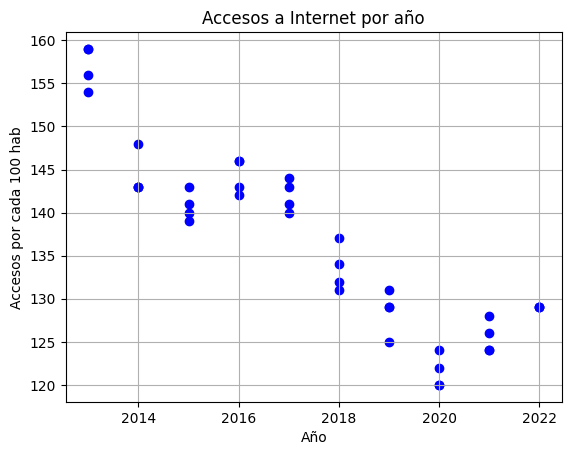

In [14]:
# Crear el gráfico de dispersión con color personalizado
plt.scatter(df_accesos_Tmovil['Año'], df_accesos_Tmovil['Accesos por cada 100 hab'], color='b')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Accesos a Internet por año')
plt.grid(True)

# Mostrar el gráfico de dispersión
plt.show()

El gráfico de dispersión muestra la relación entre el año y el número de accesos a Internet por cada 100 habitantes. La variable del eje x representa el año, mientras que la variable del eje y representa la cantidad de accesos a Internet por cada 100 habitantes.

El gráfico utiliza puntos dispersos para representar cada combinación de año y número de accesos. Cada punto en el gráfico indica la cantidad de accesos a Internet por cada 100 habitantes en un año específico.